# TP 4 Regression logistique avec régularisation
Dans ce TP, nous aimerions faire une classification binaire en utilisant la régression.

Pour ce faire, nous étudierons un ensemble de données avec la variable  (y) representant la commercialisation d'un profuit et les caractéristiques (X) representant les résultat des tests de qualité test 1 et test 2 du produit.

La prédiction se fera avec l'agorithme de descente du gradient avec régularisation.

# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
from google.colab import drive as drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# données
data = np.genfromtxt("/content/gdrive/My Drive/TP/TP4/data.csv", delimiter=',', dtype=float)
data.shape 

(118, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente la commercialisation (1 oui 0 non).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [ ]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2];
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

In [ ]:
print('X', X.shape ,' y ', y.shape)

X (118, 3)  y  (118, 1)


# Transformation de données
Dans cette partie, nous aimerions transformer nos données afin d'avoir une fonction polynomiale de degrée 6.

La fonction sera:

$x_0=1$

$x_1=x_1$

$x_2=x_2$

$x_3={x_1}^2$

$x_4={x_1}x_2$

$x_5={x_2}^2$

$x_6={x_1}^3$

$x_7={x_1}^2 x_2$

$x_8= x_1 {x_2}^2$

$x_9= {x_2}^3$

...


Pour un polynme de degrée 6 à 2 variables nous aurons 28 caracteristiques

**Question**: comment avons nous trouvé ce chiffre?

**Astuce**: référez vous aux probabilités

In [ ]:
def mapping(X):
    cols = 28
    degree = 7
    outX = np.ones((X.shape[0],cols))
    X1 = X[:,1]
    X2 = X[:,2]
    k=0
    for i in range(degree):
        for j in range(i+1):
            outX[:, k] = np.power(X1,i-j)*(np.power(X2,j));
            k=k+1
    return outX    

In [ ]:
X2=mapping(X)
X2.shape

(118, 28)

# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [ ]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1/(1+np.exp(-z));

In [ ]:
k=Sigmoid(-10)
k

4.5397868702434395e-05

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [ ]:
#cost function
def computeCostReg(X, y, theta, lambdaa = 0.1):
    m = len(y)
    y_pred = Sigmoid(np.dot(X[1:,:], theta))
    error = y[1:,:] * np.log(y_pred) + (1 - y[1:,:]) * np.log(1 - y_pred)
    cost = - 1 / m * np.sum(error)
    reg = (lambdaa / (2*m)) * np.sum(np.power(theta[1:], 2))
    J = cost + reg
    return J

In [ ]:
def computeCostReg(X, y, theta, lambdaa = 1):
    number_examples = X.shape[0] #m = len(y)
    hypothesis = Sigmoid(np.dot(X, theta))
    z1 = y * np.log(hypothesis) + (1 - y) * np.log(1 - hypothesis)
    z2 = np.power(theta, 2)
    J =  (-(1/number_examples)*np.sum(z1)) + ((lambdaa/2*number_examples)*np.sum(z2))
    return J

In [ ]:
def computeCostReg(X, y, theta, lambdaa = 1):
    m = len(y)
    y_pred = Sigmoid(np.dot(X, theta))
    error = y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)
    cost = - 1 / m * np.sum(error)
    reg = (lambdaa / (2*m)) * np.sum(np.power(theta[1:], 2))
    J = cost + reg
    return J

In [ ]:
#cost function
def computeCostReg(X, y, theta, lambdaa = 0.1):
    m = len(y)
    y_pred = Sigmoid(np.dot(X[1:,:], theta))
    error = y[1:,:] * np.log(y_pred) + (1 - y[1:,:]) * np.log(1 - y_pred)
    cost = - 1 / m * np.sum(error)
    reg = (lambdaa / (2*m)) * np.sum(np.power(theta[1:], 2))
    J = cost + reg
    return J

In [ ]:
def computeCostReg(X, y,theta, landa):
    m = len(y)
    k=y*np.log(Sigmoid(np.dot(X,theta))) + (1-y) * np.log(1-Sigmoid(np.dot(X,theta)))
    #return -(1/m)*(np.sum(k) + (landa/2)*np.sum((theta[1:]**2)))
    return -1/m * np.sum(k) + (landa / (2*m))*np.sum(theta[1:]**2)
    print(1/m)
    print('k= ',k)
    #return (1/m)*(((np.sum(k))) + ((landa/2)*np.sum((theta[1:]**2))))


2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [ ]:
def gradientDescent(X, y, theta, alpha, iterations, lambda_, early_stopping=False): 
    epsilon = 1e-9
    costs = []
    gradients = []
    for i in range(iterations):
        y_hat = Sigmoid(X @ theta)
        
        error = y_hat - y
        cost = computeCostReg(X, y, theta, lambda_)
        costs.append(cost)
        
        theta_grad = np.expand_dims((X * error).mean(axis=0), axis=1)
        gradients.append(theta_grad)
        theta[0] = theta[0] - alpha * theta_grad[0]
        theta[1:] = theta[1:] * (1 - lambda_ * alpha / X.shape[0]) - alpha * theta_grad[1:]
        
        if early_stopping and np.absolute(theta_grad.mean()) < epsilon:
            break;
    
    return theta

In [ ]:
#cette fonction calcule theta + donne l'historique de la fonction cout et des valeurs de theta
def gradientDescentHistory(X, y, theta, alpha, iterations, lambdaa):
    # garder aussi le cout à chaque itération 
    # pour afficher le coût en fonction de theta0 et theta1
    theta_history = np.zeros((iterations, 28))
    cost_history = np.zeros(iterations)
    m = len(y)
    n = X.shape[1]
    for iter in range(0, iterations):
      theta_temp = np.zeros((n, 1))
      for j in range(0,len(theta)):
        somme = 0
        for i in range(1, m):
          hypothesis_i = 0
          for k in range(n):
            hypothesis_i += theta[k]*X[i][k]
          hypothesis_i = (hypothesis_i - y[i])*X[i][j]
          somme += hypothesis_i
    
          theta_temp[j] = theta[j] - alpha * ((1/m) * somme + (landa / m) * theta[j] * j)
      
      theta = theta_temp      
      theta_history[iter,:] = theta.T
      cost_history[iter] =  computeCostReg(X, y, theta)

    return theta, theta_history, cost_history

In [ ]:
def gradientDescent(X, y, theta, alpha, iterations, lambdaa):
  m=len(y)     
  for iter in range(iterations):
      print("iter = ",iter)
      hypothesis = np.dot(X, theta)[:,0]
      diff = np.subtract(Sigmoid(hypothesis), y)
      
      #theta 0
      diff_0 = np.array(X[:,0])*(np.array(diff))
      theta [0] = theta[0]  - (1 / m) * alpha *(np.sum(diff_0))

      for i in range(1, len(theta)):
        diff_i= np.array(X[:,i])*(np.array(diff))
        theta[i] = theta[i]  - (1 / m) * alpha *(np.sum(diff_i) + (lambdaa/m)*theta[i][0])
      
  return theta

In [ ]:
#miss perfect
def gradientDescent(X, y, theta, alpha, iterations, lambdaa):
  m=len(y)     
  for iter in range(iterations):
      X=X[1:]
      thata = theta[1:]
      for i in range(1, X.shape[0]):
        hypothesis += X[i]
      hypothesis = np.dot(X[:], theta[:])[:,0]
      diff = np.subtract(Sigmoid(hypothesis), y[1:])
      #theta 0
      diff_0 = np.array(X[:,0])*(np.array(diff))
      theta [0] = theta[0]  - (1 / m) * alpha *(np.sum(diff_0))

      for i in range(1, len(theta)):
        diff_i= np.array(X[:,i])*(np.array(diff))
        theta[i] = theta[i]  - (1 / m) * alpha *(np.sum(diff_i) + (lambdaa/m)*theta[i][0])
      
  return theta

In [ ]:
def gradientDescent(X, y, theta, alpha, iterations, landa):
    theta_history = []
    cost_history = []
    m=len(y)
    for iter in range(iterations):
      cost_history.append(computeCostReg(X, y, theta,landa))
      hypothesis = Sigmoid(np.dot(X,theta))
      diff = hypothesis-y
      diff_=(X*diff)
      theta[0] = theta[0]  - (1 / m) * alpha *np.sum(diff_[:,0])
      theta_history.append(theta)

      for i in range(1,len(theta)):
        #theta[i] -= theta[i] * (1 - landa* alpha / m) - (alpha/m) * np.sum(diff_[:,i])
        #theta[i] = theta[i] - (alpha/m) * np.sum(diff_[:,i]) + theta[i] * (landa* alpha / m)
        theta[i] = theta[i] - (alpha/m) * np.sum(diff_[:,i]) - theta[i] * (landa* alpha / m)

      
    return theta

In [ ]:
def gradientDescent(X, y, theta, alpha, iterations, landa):
    m=len(y)
    for iter in range(iterations):
      hypothesis = Sigmoid(np.dot(X,theta))
      diff = hypothesis-y
      diff_=(X*diff)
      theta_=diff_.mean(axis=0)
      theta_=theta_.reshape(theta_.shape[0],1)
      theta[0] = theta[0]  - (1 / m) * alpha *np.sum(diff_[:,0])
      for i in range(1,len(theta)):
          theta[i] = theta[i] - (alpha/m) * np.sum(diff_[:,i]) - theta[i] * (landa* alpha / m)
        
    return theta

In [ ]:
def gradientDescent(X, y, theta, alpha, iterations, landa):
    m=len(y)
    n = X.shape[1]
    for iter in range(iterations):
      theta_temp = np.zeros((n, 1))
      hypothesis = Sigmoid(np.dot(X[1:,:],theta)) - y[1:,:]
      for j in range(0,len(theta)):
        diff = (hypothesis * X[1:,j]) [:,0]
        theta_temp[j] = theta[j] - alpha * ((1/m) * np.sum(diff) + (landa / m) * theta[j] * j)
      
      theta = theta_temp
    return theta

In [ ]:
def gradientDescent(X, y, theta, alpha, iterations, landa):
    m=len(y)
    n = X.shape[1]
    for iter in range(iterations):
      theta_temp = np.zeros((n, 1))
      hypothesis = Sigmoid(np.dot(X[1:,:],theta)) - y[1:,:]
      for j in range(0,len(theta)):
        diff = X[1:,j].T.dot(hypothesis)
        theta_temp[j] = theta[j] - alpha * ((1/m) * np.sum(diff) + (landa / m) * theta[j] * j)
      
      theta = theta_temp
    return theta

In [ ]:
def gradientDescent(X, y, theta, alpha, iterations, landa):
    m = len(y)
    n = X.shape[1]
    for iter in range(0, iterations):
      theta_temp = np.zeros((n, 1))
      for j in range(0,len(theta)):
        somme = 0
        for i in range(1, m):
          hypothesis_i = 0
          for k in range(n):
            hypothesis_i += theta[k]*X[i][k]
          hypothesis_i = (hypothesis_i - y[i])*X[i][j]
          somme += hypothesis_i
        
        if j == 0:
          theta_temp[0] = theta[0]  - (1 / m) * alpha * somme
        else:
          theta_temp[j] = theta[j] - alpha * ((1/m) *(hypothesis_i - y[i])*X[i][0] + (landa / m) * theta[j])
      
      theta = theta_temp
      return theta

In [ ]:
def gradientDescent(X, y, theta, alpha, iterations, landa):
    m=len(y)
    for iter in range(iterations):
      hypothesis = Sigmoid(np.dot(X[1:,:],theta)) - y[1:,:]
      for j in range(0,len(theta)):
        diff = hypothesis * X[1:,j]
        theta[j] = theta[j] - alpha * ((1/m) * np.sum(diff) + (landa / m) * theta[j] * j)

    return theta

In [ ]:
def gradientDescent(X, y, theta, alpha, iterations, landa):
    m=len(y)
    for iter in range(iterations):
      hypothesis = Sigmoid(np.dot(X[1:,:],theta)) - y[1:,:]
      diff = (hypothesis * X[1:,:])
      for j in range(len(theta)):
         theta[j] = theta[j] - alpha * ((1/m) * np.sum(diff[:,j]) + (landa / m) * theta[j] * j)
    return theta

In [ ]:
n=X2.shape[1]
vect = np.ones((5, 1))
vect[0][0] = 0
theta= np.ones((5, 1))
theta = theta*vect
print(theta == vect)
print(y.shape)

[[ True]
 [ True]
 [ True]
 [ True]
 [ True]]
(118, 1)


In [ ]:
def gradientDescent(X, y, theta, alpha, iterations, landa):
    m = len(y)
    for iter in range(iterations):
      hypothesis = Sigmoid(np.dot(X,theta))
      diff = hypothesis-y
      diff_=(X*diff)
      theta[0] = theta[0]  - (1 / m) * alpha *np.sum(diff_[:,0])
      for i in range(1,len(theta)):
        theta[i] = theta[i] * (1 - landa* alpha / m) - (alpha/m) * np.sum(diff_[:,i])
  
    return theta

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [ ]:
n=X2.shape[1]
theta = np.zeros((n, 1))
theta.shape
theta_= theta[1:,:]
theta_.shape

(27, 1)

Calculer le cout initial

In [ ]:
initialCost2 = computeCostReg(X2, y, theta)
print(initialCost2)

0.43504494557113604


Appel des la fonction de calcul du gradient

In [ ]:
n=X2.shape[1]
theta = np.zeros((n, 1))
# paramètres
iterations = 5000;
alpha = 0.03;

# paramètre de regression
landa = 0.1;

# Appel
theta = gradientDescent(X2, y, theta, alpha, iterations, landa);

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [ ]:
def drawCircle(X, y, theta, title="", linrange=101):
    npoints = linrange
    gridx1, gridx2 = np.meshgrid(np.linspace(X[:, 1].min(),X[:, 1].max(),npoints), np.linspace(X[:, 2].min(),X[:, 2].max(),npoints))
    grid = np.c_[np.ones(gridx1.size),gridx1.flatten(), gridx2.flatten()]
    print(gridx1.shape)
    Z = (mapping(grid) @ theta).reshape(gridx1.shape)

    plt.contour(gridx1, gridx2, Z, levels=[0], colors= "black", linestyles="solid", linewidths=3)
    #plt.pcolor(gridx1, gridx2, Z, cmap='binary')
    plt.scatter(X2[np.where(y==1),1],X2[np.where(y==1),2], label="y=1",marker ='o')
    plt.scatter(X2[np.where(y==0),1],X2[np.where(y==0),2], label="y=0",marker ='x')

    plt.title(title)
    plt.xlabel('x 1')
    plt.ylabel('x 2')
    plt.show()

# Classification (Prédiction)
Ici il serait interessant de calculer la prédiction en utilisant un seuil
i.e. si h>seuil alors classe =1 sinon classe = 0

In [ ]:
def predict(X):
     i = 0
     j = 0
     exp = 0
     pred_vect = []
     m = 118
     while (i < 118):
        exp = 0
        while j<theta.shape[0]:
          exp += X[i][j]* theta[j][0]
          j+=1
        
        if (Sigmoid(exp)>0.5):
            pred_vect.append(1)
        else:
            pred_vect.append(0)
        
        i+=1
        
     return pred_vect

# Affichage 
Graphe representant les acceptations selon les caracteristiques

In [ ]:
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="y=1",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="y=0",marker ='x')
plt.xlabel('x 1')
plt.ylabel('x 2')
drawCircle(X2, y, theta, linrange=101)

NameError: ignored

Traçage du coût en fonction de theta0 et theta1

In [ ]:
n = X2.shape[1]
theta = np.zeros((n, 1))
# paramètres
iterations = 1500;
alpha = 0.01;

# paramètre de regression
lambdaa = 1;
theta, theta_history, cost_history= gradientDescentHistory(X2, y, theta, alpha, iterations, lambdaa)

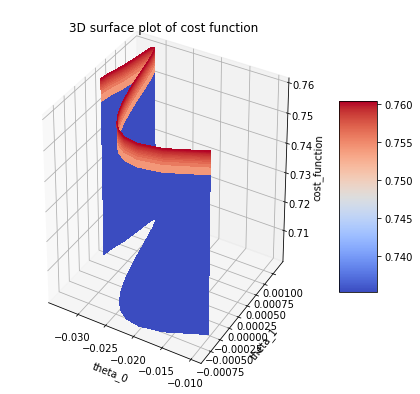

In [ ]:
fig= plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('3D surface plot of cost function')
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('cost_function')
theta_history_ultime=theta_history.reshape(theta_history.shape[1],theta_history.shape[0])
x1=theta_history[:,0]
x2=theta_history[:,1]
f=cost_history.reshape(1500,1)
surface=ax.plot_surface(x1, x2, f, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surface, shrink=0.5, aspect=5)
plt.show()

# Qualité du classifieur

Prédire des valeurs de y

Ici il serait interessant de calculer la précision de notre classifieur

Essayons de calculer ça avec 

moyenne(y==y-pred) * 100

Ceci donnera un pourcentage de precision

In [ ]:
# calcul de precision = nombre de valeurs bien prédites (ici sur toute la base X)
y_pred=predict(X2)
precision = np.mean(y==y_pred)*100
print(precision)

50.83309393852341


# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X2, y)
y_pred = logisticRegr.predict(X2)
precision = np.mean(y==y_pred)*100
print(precision)

49.87072680264292


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 01 Avril 2022 à 22h


In [ ]:
# bonne chance